In [1]:
%pylab inline
import os

Populating the interactive namespace from numpy and matplotlib


In [4]:
def plot_comparison(v_max=300, view_angle=0, logT=4.0, logtau=6.0):
    filename_in="../data/CLARA/Rotating%dSphere%dt.ascii"%(v_max, int(logtau))
    filename_out ="../data/tmp/Sphere_V%d_T2E7_%d_out.dat"%(v_max,view_angle)
    filename_obs = "../data/obs/tol.txt"
    command = "python viewing_angle.py %s %s %d > %s"%(filename_obs, filename_in, view_angle, filename_out)
    print command

    os.system(command)
    data = np.loadtxt(filename_out)
    tol = np.loadtxt(filename_obs)
    voff = 39.2342980263
    
    v_th = 12.85*sqrt((10.0**logT)/(10.0**4.0))
    binT = tol[1,0]-tol[0,0]
    binC = 12.85*(data[1,1] - data[0,1])

    vel_theory = -data[:,1]*v_th + voff
    intensity_theory = data[:,0]
    vel_obs = tol[:,0]
    intensity_obs = tol[:,1]
    
    norm_theory = fabs(trapz(intensity_theory, vel_theory))
    norm_obs = fabs(trapz(intensity_obs, vel_obs))
    
    intensity_theory = intensity_theory/norm_theory
    intensity_obs = intensity_obs/norm_obs
    
    fig, ax = pyplot.subplots(figsize=(8, 8))
    ax.plot(vel_theory, intensity_theory*1E3,
            label=r"$\theta = %d, V_{max}=%dkms^{-1}, \tau=10^%d$"%(view_angle,v_max,logtau),
           linewidth=4,alpha=0.5)
    ax.plot(vel_obs, intensity_obs*1E3)
    ax.scatter(vel_obs, intensity_obs*1E3, label="TOL",s=50.0)
    ax.legend(fontsize=10)
    xlabel(r"$V(km/s)$", fontsize=20)
    #fig.savefig("../figs/CLARA-TOL_%d_%d.png"%(view_angle, v_max))
    #close()
    return 

python viewing_angle.py ../data/obs/tol.txt ../data/CLARA/Rotating300Sphere7t.ascii 0 > ../data/tmp/Sphere_V300_T2E7_0_out.dat
python viewing_angle.py ../data/obs/tol.txt ../data/CLARA/Rotating300Sphere7t.ascii 10 > ../data/tmp/Sphere_V300_T2E7_10_out.dat
python viewing_angle.py ../data/obs/tol.txt ../data/CLARA/Rotating300Sphere7t.ascii 15 > ../data/tmp/Sphere_V300_T2E7_15_out.dat
python viewing_angle.py ../data/obs/tol.txt ../data/CLARA/Rotating300Sphere7t.ascii 20 > ../data/tmp/Sphere_V300_T2E7_20_out.dat
python viewing_angle.py ../data/obs/tol.txt ../data/CLARA/Rotating300Sphere7t.ascii 25 > ../data/tmp/Sphere_V300_T2E7_25_out.dat
python viewing_angle.py ../data/obs/tol.txt ../data/CLARA/Rotating300Sphere7t.ascii 30 > ../data/tmp/Sphere_V300_T2E7_30_out.dat
python viewing_angle.py ../data/obs/tol.txt ../data/CLARA/Rotating300Sphere7t.ascii 40 > ../data/tmp/Sphere_V300_T2E7_40_out.dat
python viewing_angle.py ../data/obs/tol.txt ../data/CLARA/Rotating300Sphere7t.ascii 60 > ../data/tm

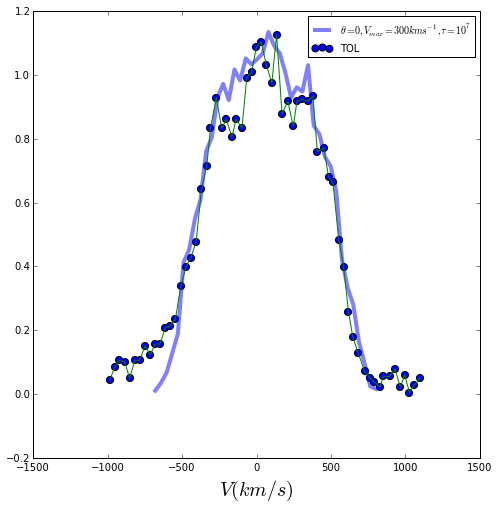

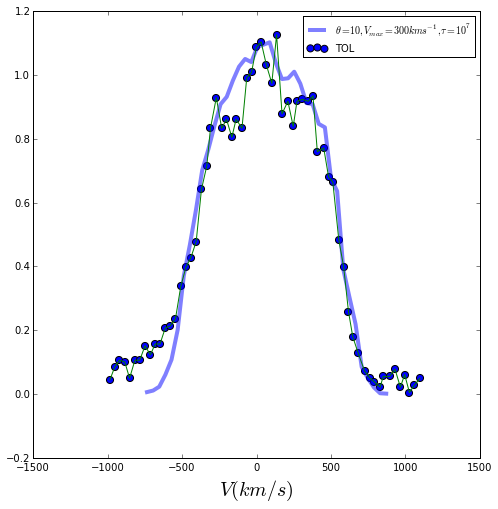

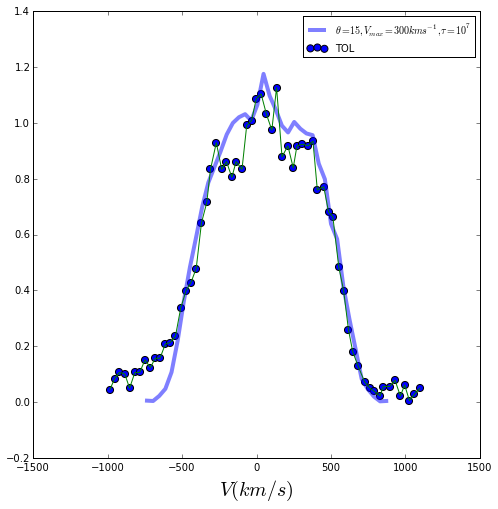

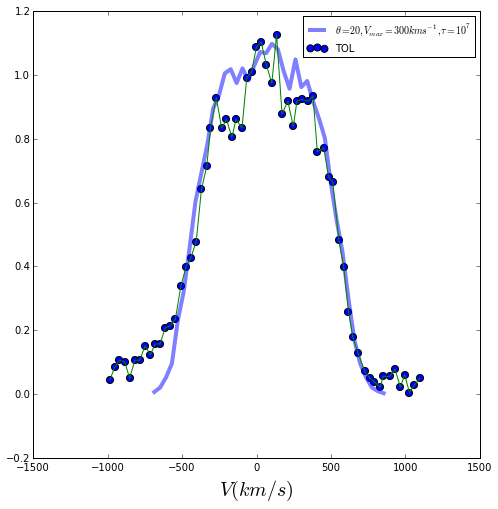

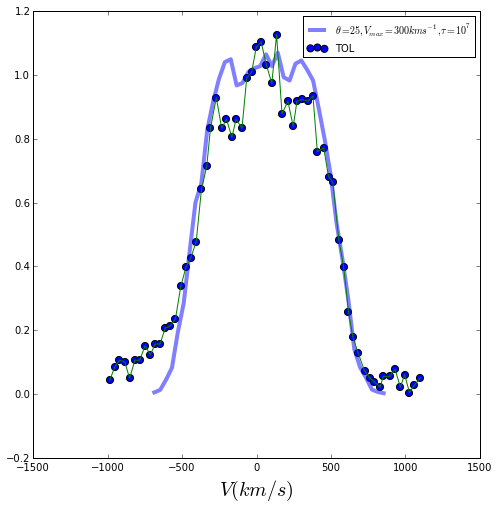

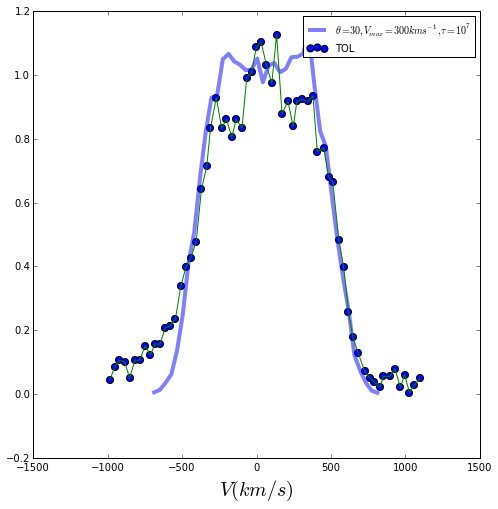

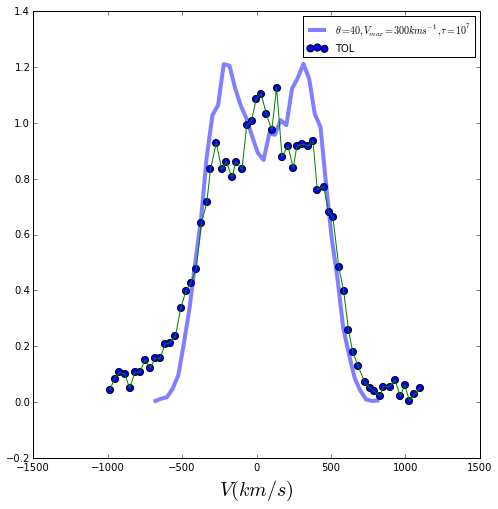

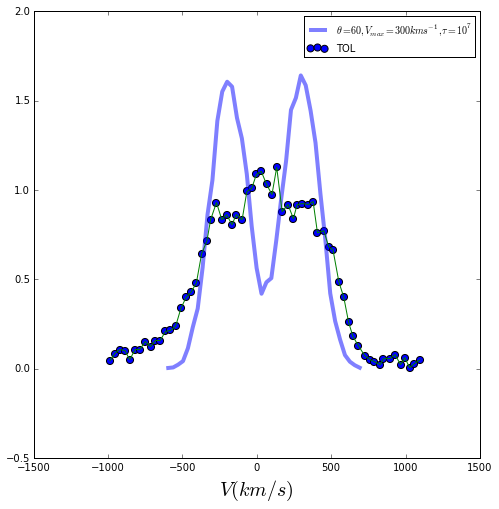

In [5]:
v_list = [300]
angle_list = [0,10,15,20,25,30,40,60]
for v in v_list:
    for a in angle_list:
        plot_comparison(v_max=v, view_angle=a, logT=4.2, logtau=7)